# Iterated Functions System

This examples show how to generate fractal sets using iterated functions systems, see [here](https://en.wikipedia.org/wiki/Iterated_function_system) for an introduction.

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

**Tree traversal algorithm (the chaos game)**

In [2]:
def drawIFS(f_i, skip = 100, iterations = 1000, batch_size = 1, name="IFS", color="blue"):
    # Any set of initial points should work in theory
    initialPoints = ot.Normal(2).getSample(batch_size)
    # Compute the contraction factor of each function
    all_r = [m.sqrt(abs(f[1].computeDeterminant())) for f in f_i]
    # Find the box counting dimension, ie the value s such that r_1^s+...+r_n^s-1=0
    equation = "-1.0"
    for r in all_r:
        equation += "+" + str(r) + "^s"
    dim = len(f_i)
    s = ot.Brent().solve(ot.SymbolicFunction("s", equation), 0.0, 0.0, -m.log(dim)/m.log(max(all_r)))
    # Add a small perturbation to sample even the degenerated transforms
    probabilities = [r**s+1e-2 for r in all_r]
    # Build the sampling distribution
    support = [[i] for i in range(dim)]
    choice = ot.UserDefined(support, probabilities)
    currentPoints = initialPoints
    points = ot.Sample(0, 2)
    # Convert the f_i into LinearEvaluation to benefit from the evaluation over
    # a Sample
    phi_i = [ot.LinearEvaluation([0.0]*2, f[0], f[1]) for f in f_i]
    # Burning phase
    for i in range(skip):
        index = int(round(choice.getRealization()[0]))
        currentPoints = phi_i[index](currentPoints)
    # Iteration phase
    for i in range(iterations):
        index = int(round(choice.getRealization()[0]))
        currentPoints = phi_i[index](currentPoints)
        points.add(currentPoints)
    # Draw the IFS
    graph = ot.Graph()
    graph.setTitle(name)
    graph.setXTitle("x")
    graph.setYTitle("y")
    graph.setGrid(True)
    cloud = ot.Cloud(points)
    cloud.setColor(color)
    cloud.setPointStyle("dot")
    graph.add(cloud)
    return graph, s

**Definition of some IFS**

Box counting dimension=1.146


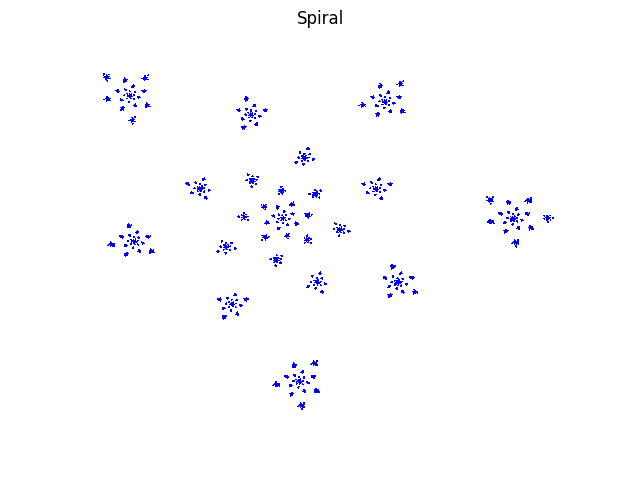

In [3]:
# Spiral
rho1 = 0.9
theta1 = 137.5 * m.pi / 180.0
f1 = [[0.0]*2, ot.SquareMatrix(2, [rho1 * m.cos(theta1), -rho1 * m.sin(theta1), \
                                   rho1 * m.sin(theta1),  rho1 * m.cos(theta1)])]

rho2 = 0.15
f2 = [[1.0, 0.0],rho2 * ot.SquareMatrix.identityMatrix(2)]
f_i = [f1, f2]
graph, s = drawIFS(f_i, skip = 100, iterations = 100000, batch_size = 1, name="Spiral", color="blue")
print("Box counting dimension=%.3f" % s)
graph

Box counting dimension=1.834


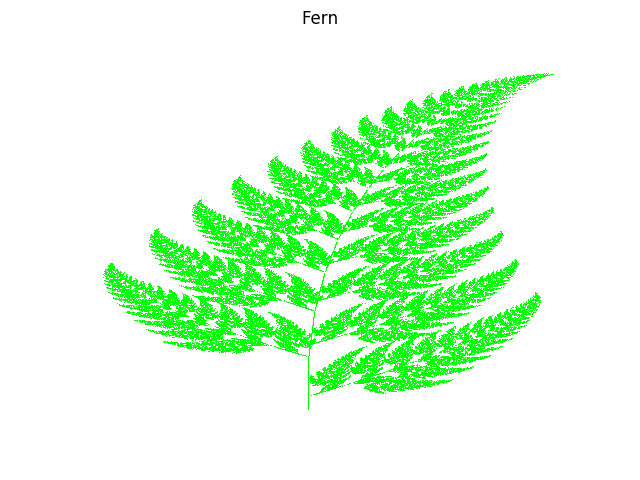

In [4]:
# Fern
f1 = [[0.0]*2, ot.SquareMatrix(2, [0.0, 0.0, 0.0, 0.16])]
f2 = [[0.0, 1.6], ot.SquareMatrix(2, [0.85, 0.04, -0.04, 0.85])]
f3 = [[0.0, 1.6], ot.SquareMatrix(2, [0.2, -0.26, 0.23, 0.22])]
f4 = [[0.0, 0.44], ot.SquareMatrix(2, [-0.15, 0.28, 0.26, 0.24])]
f_i = [f1, f2, f3, f4]
graph, s = drawIFS(f_i, skip = 100, iterations = 100000, batch_size = 1, name="Fern", color="green")
print("Box counting dimension=%.3f" % s)
graph

Box counting dimension=2.000


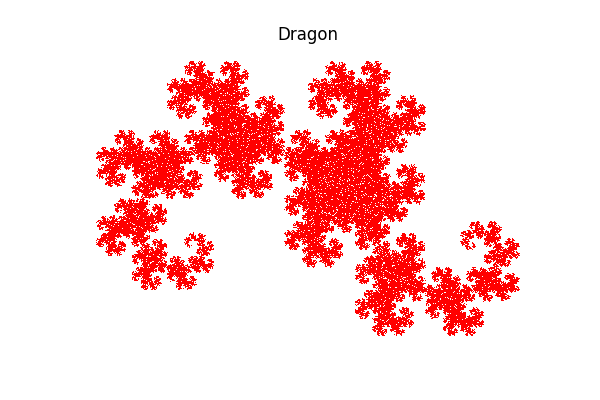

In [9]:
# Dragon
f1 = [[0.0, 0.0], ot.SquareMatrix(2, [0.5, -0.5, 0.5, 0.5])]
f2 = [[1.0, 0.0], ot.SquareMatrix(2, [-0.5, -0.5, 0.5, -0.5])]
f_i = [f1, f2]
graph, s = drawIFS(f_i, skip = 100, iterations = 100000, batch_size = 1, name="Dragon", color="red")
print("Box counting dimension=%.3f" % s)
graph

Box counting dimension=1.585


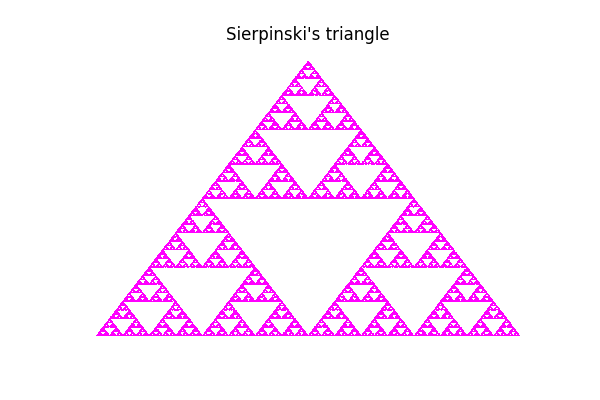

In [10]:
# Sierpinski triangle
f1 = [[0.0, 0.0], ot.SquareMatrix(2, [0.5, 0.0, 0.0, 0.5])]
f2 = [[0.5, 0.0], ot.SquareMatrix(2, [0.5, 0.0, 0.0, 0.5])]
f3 = [[0.25, m.sqrt(3.0)/4.0], ot.SquareMatrix(2, [0.5, 0.0, 0.0, 0.5])]
f_i = [f1, f2, f3]
graph, s = drawIFS(f_i, skip = 100, iterations = 100000, batch_size = 1, name="Sierpinski's triangle", color="magenta")
print("Box counting dimension=%.3f" % s)
graph